In [1]:
%load_ext lab_black
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# load mortality rate data

fl_pre_policy_mortality = pd.read_csv(
    "./fl_pre_policy_mortality.csv",
    sep=",",
)
fl_post_policy_mortality = pd.read_csv(
    "./fl_post_policy_mortality.csv",
    sep=",",
)
tx_pre_policy_mortality = pd.read_csv(
    "./tx_pre_policy_mortality.csv",
    sep=",",
)
tx_post_policy_mortality = pd.read_csv(
    "./tx_post_policy_mortality.csv",
    sep=",",
)
wa_pre_policy_mortality = pd.read_csv(
    "./wa_pre_policy_mortality.csv",
    sep=",",
)
wa_post_policy_mortality = pd.read_csv(
    "./wa_post_policy_mortality.csv",
    sep=",",
)

In [3]:
# concatenate pre and post mortality rate data

fl_mortality = pd.concat([fl_pre_policy_mortality, fl_post_policy_mortality])
tx_mortality = pd.concat([tx_pre_policy_mortality, tx_post_policy_mortality])
wa_mortality = pd.concat([wa_pre_policy_mortality, wa_post_policy_mortality])

In [4]:
# subset to dataframes with averaged mortality rate by year for each state

fl_mortality_avg = fl_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
tx_mortality_avg = tx_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
wa_mortality_avg = wa_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()

In [5]:
fl_mortality_avg

,Year,Mortality Rate
0,2003,0.000118
1,2004,0.000126
2,2005,0.000137
3,2006,0.000159
4,2007,0.000151
5,2008,0.000164
6,2009,0.000159
7,2010,0.000122
8,2011,0.000123
9,2012,0.000143


In [6]:
tx_mortality_avg

,Year,Mortality Rate
0,2003,0.000094
1,2004,0.000083
2,2005,0.000091
3,2006,0.000131
4,2007,0.000098
5,2008,0.000104
6,2009,0.000116
7,2010,0.000107
8,2011,0.000109
9,2012,0.000100


In [7]:
wa_mortality_avg

,Year,Mortality Rate
0,2003,0.000101
1,2004,0.000130
2,2005,0.000131
3,2006,0.000143
4,2007,0.000139
5,2008,0.000145
6,2009,0.000143
7,2010,0.000120
8,2011,0.000143
9,2012,0.000140


### Plot Pre-Post Policy for Florida, Texas, and Washington

#### Florida

In [8]:
# seperate to pre and post policy periods for FL

x_pre = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Year"])
y_pre = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Mortality Rate"])

x_post = np.array(fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Year"])
y_post = np.array(fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Mortality Rate"])

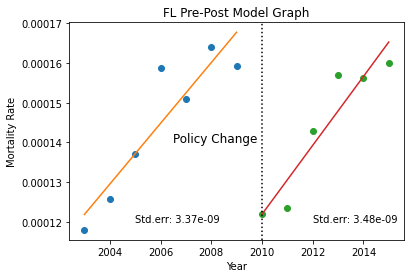

In [9]:
# plot the figure

fig, ax = plt.subplots()
ax.plot(x_pre, y_pre, "o")
m, b = np.polyfit(x_pre, y_pre, 1)
plt.plot(x_pre, m * x_pre + b)
ax.plot(x_post, y_post, "o")
m, b = np.polyfit(x_post, y_post, 1)
plt.plot(x_post, m * x_post + b)
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("FL Pre-Post Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2006.5, 0.00014, "Policy Change", fontsize=12)
plt.text(2005, 0.00012, "Std.err: 3.37e-09", fontsize=10)
plt.text(2012, 0.00012, "Std.err: 3.48e-09", fontsize=10)
plt.show()

In [10]:
import warnings

warnings.filterwarnings("ignore")

# regression result for pre policy period -- obtain standard error

model_pre = sm.OLS(y_pre, x_pre)
result_pre = model_pre.fit()
print(result_pre.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              457.5
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    6.81e-07
Time:                        21:59:50   Log-Likelihood:                          67.118
No. Observations:                   7   AIC:                                     -132.2
Df Residuals:                       6   BIC:                                     -132.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
import warnings

warnings.filterwarnings("ignore")

# regression result for post policy period -- obtain standard error

model_post = sm.OLS(y_post, x_post)
result_post = model_post.fit()
print(result_post.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              420.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    5.10e-06
Time:                        21:59:50   Log-Likelihood:                          57.876
No. Observations:                   6   AIC:                                     -113.8
Df Residuals:                       5   BIC:                                     -114.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Texas

In [12]:
# seperate to pre and post policy periods for TX

x_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Mortality Rate"])

x_post_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Year"])
y_post_tx = np.array(
    tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Mortality Rate"]
)

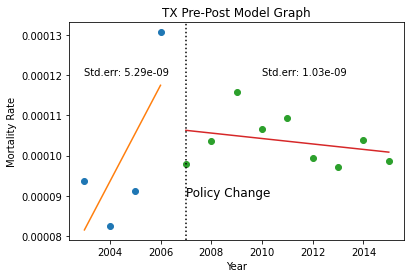

In [13]:
# plot the figure

fig, ax = plt.subplots()
ax.plot(x_pre_tx, y_pre_tx, "o")
m, b = np.polyfit(x_pre_tx, y_pre_tx, 1)
plt.plot(x_pre_tx, m * x_pre_tx + b)
ax.plot(x_post_tx, y_post_tx, "o")
m, b = np.polyfit(x_post_tx, y_post_tx, 1)
plt.plot(x_post_tx, m * x_post_tx + b)
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("TX Pre-Post Model Graph")
plt.axvline(x=2007, color="black", ls=":")
plt.text(2007, 0.00009, "Policy Change", fontsize=12)
plt.text(2003, 0.00012, "Std.err: 5.29e-09", fontsize=10)
plt.text(2010, 0.00012, "Std.err: 1.03e-09", fontsize=10)
plt.show()

In [14]:
import warnings

warnings.filterwarnings("ignore")

# regression result for pre policy period -- obtain standard error

model_pre_tx = sm.OLS(y_pre_tx, x_pre_tx)
result_pre_tx = model_pre_tx.fit()
print(result_pre_tx.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              87.94
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                     0.00257
Time:                        21:59:50   Log-Likelihood:                          37.941
No. Observations:                   4   AIC:                                     -73.88
Df Residuals:                       3   BIC:                                     -74.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
import warnings

warnings.filterwarnings("ignore")

# regression result for post policy period -- obtain standard error

model_post_tx = sm.OLS(y_post_tx, x_post_tx)
result_post_tx = model_post_tx.fit()
print(result_post_tx.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2493.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    2.87e-11
Time:                        21:59:51   Log-Likelihood:                          95.645
No. Observations:                   9   AIC:                                     -189.3
Df Residuals:                       8   BIC:                                     -189.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Washington

In [16]:
# seperate to pre and post policy periods for WA

x_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Mortality Rate"])

x_post_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Year"])
y_post_wa = np.array(
    wa_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Mortality Rate"]
)

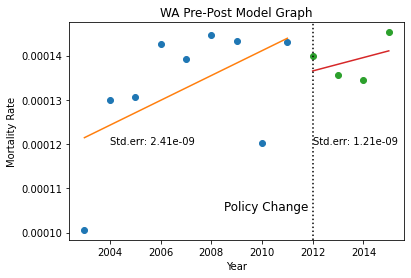

In [17]:
# plot the figure

fig, ax = plt.subplots()
ax.plot(x_pre_wa, y_pre_wa, "o")
m, b = np.polyfit(x_pre_wa, y_pre_wa, 1)
plt.plot(x_pre_wa, m * x_pre_wa + b)
ax.plot(x_post_wa, y_post_wa, "o")
m, b = np.polyfit(x_post_wa, y_post_wa, 1)
plt.plot(x_post_wa, m * x_post_wa + b)
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("WA Pre-Post Model Graph")
plt.axvline(x=2012, color="black", ls=":")
plt.text(2008.5, 0.000105, "Policy Change", fontsize=12)
plt.text(2004, 0.00012, "Std.err: 2.41e-09", fontsize=10)
plt.text(2012, 0.00012, "Std.err: 1.21e-09", fontsize=10)
plt.show()

In [18]:
import warnings

warnings.filterwarnings("ignore")

# regression result for pre policy period -- obtain standard error

model_pre_wa = sm.OLS(y_pre_wa, x_pre_wa)
result_pre_wa = model_pre_wa.fit()
print(result_pre_wa.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              754.1
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    3.33e-09
Time:                        21:59:51   Log-Likelihood:                          88.035
No. Observations:                   9   AIC:                                     -174.1
Df Residuals:                       8   BIC:                                     -173.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
import warnings

warnings.filterwarnings("ignore")

# regression result for post policy period -- obtain standard error

model_post_wa = sm.OLS(y_post_wa, x_post_wa)
result_post_wa = model_post_wa.fit()
print(result_post_wa.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              3252.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    1.19e-05
Time:                        21:59:51   Log-Likelihood:                          43.831
No. Observations:                   4   AIC:                                     -85.66
Df Residuals:                       3   BIC:                                     -86.28
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------